*italicized text*# Graph Data Analytics

In [ ]:
# !conda install networkx --yes

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
G = nx.karate_club_graph()
num_nodes = G.number_of_nodes()

num_edges = G.number_of_edges()

print(f"Graph named 'Zachary's Karate Club' with {num_nodes} nodes and {num_edges} edges")

Graph named 'Zachary's Karate Club' with 34 nodes and 78 edges


### Calculate page rank by using simple degree centrality

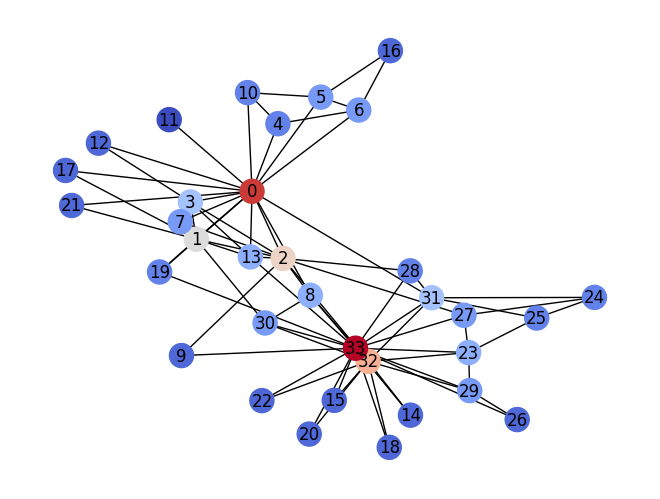

In [3]:
def simple_pagerank(G):
    p = np.array([G.degree(index) for node, index in enumerate(G.nodes())])
    return p

values = simple_pagerank(G)
nx.draw(G, cmap=plt.get_cmap('coolwarm'), node_color = values, with_labels=True)

### Calculate page rank by updating the centrality of each node with the iteration

(34,)


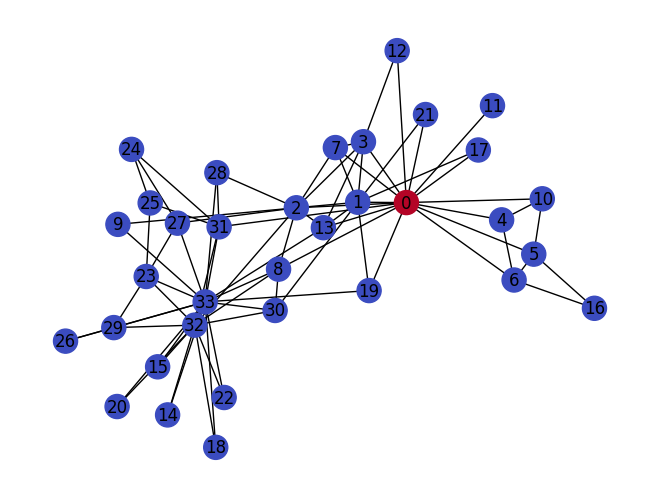

In [4]:
def pagerank_centrality(G, iter=100):
    p = np.array([1 for i in list(G.nodes())])
    print(p.shape)
    for k in range(iter):
        for i in G.nodes():
            for j in G.nodes():
                # update the centrality
                try:
                    p[i] += int(G.number_of_edges(i, j) * p[j] / G.degree[j])
                except:
                    pass
        
        norm = sum(p)
        p = p / norm        
    return p


values = pagerank_centrality(G)
nx.draw(G, cmap=plt.get_cmap('coolwarm'), node_color = values, with_labels=True)

In [7]:
def print_graph_info(graph, name=""):
    num_nodes = graph.number_of_nodes()
    num_edges = graph.number_of_edges()
    average_degree = sum(dict(graph.degree()).values()) / num_nodes if num_nodes > 0 else 0
    print(f"Name: {name}")
    print(f"Type: {type(graph).__name__}")
    print(f"Number of nodes: {num_nodes}")
    print(f"Number of edges: {num_edges}")
    print(f"Average degree: {average_degree:.4f}\n")

G = nx.read_edgelist("gr0.California.edges.txt")
G.remove_nodes_from(list(nx.isolates(G)))
print_graph_info(G)
G1 = G.subgraph(list(G.nodes())[100:150])
print_graph_info(G1)

Name: 
Type: Graph
Number of nodes: 6175
Number of edges: 15969
Average degree: 5.1721

Name: 
Type: Graph
Number of nodes: 50
Number of edges: 42
Average degree: 1.6800



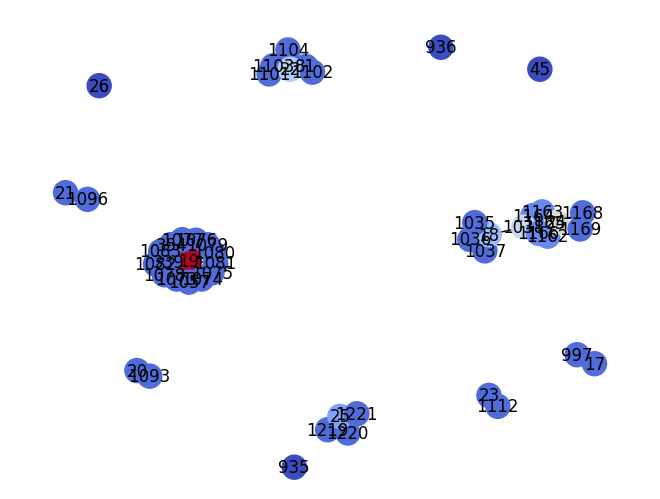

In [8]:
values = simple_pagerank(G1)
nx.draw(G1, cmap=plt.get_cmap('coolwarm'), node_color = values, with_labels=True)

(50,)


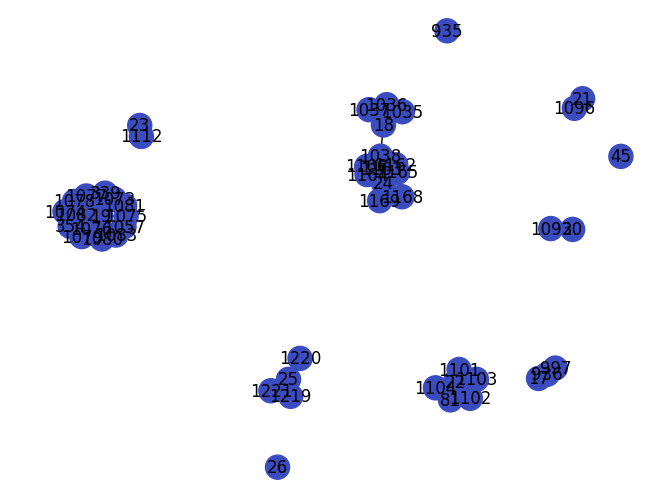

In [9]:
values = pagerank_centrality(G1)
nx.draw(G1, cmap=plt.get_cmap('coolwarm'), node_color = values, with_labels=True)